In [3]:
data ="""But I must explain to you how all this mistaken idea of denouncing
pleasure and praising pain was born and I will give you a complete account of
 the system, and expound the actual teachings of the great explorer of the truth, the master-builder of human happiness. No one rejects,
dislikes, or avoids pleasure itself, because it is pleasure, but because those who do not know
how to pursue pleasure rationally encounter consequences that are extremely painful. Nor again
is there anyone who loves or pursues or desires to obtain pain of itself, because it is pain,
but because occasionally circumstances occur in which toil and pain can procure him some great
pleasure. To take a trivial example, which of us ever undertakes laborious physical exercise,
except to obtain some advantage from it? But who has any right to find fault with a man who
chooses to enjoy a pleasure that has no annoying consequences, or one who avoids a pain that
produces no resultant pleasure?"""

data = data.split('.')
data

['But I must explain to you how all this mistaken idea of denouncing\npleasure and praising pain was born and I will give you a complete account of\n the system, and expound the actual teachings of the great explorer of the truth, the master-builder of human happiness',
 ' No one rejects,\ndislikes, or avoids pleasure itself, because it is pleasure, but because those who do not know\nhow to pursue pleasure rationally encounter consequences that are extremely painful',
 ' Nor again\nis there anyone who loves or pursues or desires to obtain pain of itself, because it is pain,\nbut because occasionally circumstances occur in which toil and pain can procure him some great\npleasure',
 ' To take a trivial example, which of us ever undertakes laborious physical exercise,\nexcept to obtain some advantage from it? But who has any right to find fault with a man who\nchooses to enjoy a pleasure that has no annoying consequences, or one who avoids a pain that\nproduces no resultant pleasure?']

In [4]:
import re
c1 = []
for sen in data:
  sen = re.sub("[^A-Za-z0-9]+", ' ', sen)
  sen = re.sub("(?:^| )\w(?:$| )", ' ', sen).strip()
  sen = sen.lower()
  c1.append(sen)
c1

['but must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and will give you complete account of the system and expound the actual teachings of the great explorer of the truth the master builder of human happiness',
 'no one rejects dislikes or avoids pleasure itself because it is pleasure but because those who do not know how to pursue pleasure rationally encounter consequences that are extremely painful',
 'nor again is there anyone who loves or pursues or desires to obtain pain of itself because it is pain but because occasionally circumstances occur in which toil and pain can procure him some great pleasure',
 'to take trivial example which of us ever undertakes laborious physical exercise except to obtain some advantage from it but who has any right to find fault with man who chooses to enjoy pleasure that has no annoying consequences or one who avoids pain that produces no resultant pleasure']

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
x = stopwords.words('english')
x[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we']

In [6]:
c2 = []
for sen in c1:
  print(len(sen.split(" ")), "Intially")
  tmp = []
  for words in sen.split(" "):
    if words in x:
      continue
    tmp.append(words)
  print(len(tmp), "After removing stop words")
  c2.append(" ".join(tmp))


45 Intially
23 After removing stop words
30 Intially
14 After removing stop words
36 Intially
15 After removing stop words
49 Intially
27 After removing stop words


In [7]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
obj = WordNetLemmatizer()
c3 = []
for sen in c2:
  t1 = sen.split()
  for i in range(len(t1)):
    t1[i] = obj.lemmatize(t1[i])
  c3.append(" ".join(t1))
c3

[nltk_data] Downloading package wordnet to /root/nltk_data...


['must explain mistaken idea denouncing pleasure praising pain born give complete account system expound actual teaching great explorer truth master builder human happiness',
 'one reject dislike avoids pleasure pleasure know pursue pleasure rationally encounter consequence extremely painful',
 'anyone love pursues desire obtain pain pain occasionally circumstance occur toil pain procure great pleasure',
 'take trivial example u ever undertakes laborious physical exercise except obtain advantage right find fault man chooses enjoy pleasure annoying consequence one avoids pain produce resultant pleasure']

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(c3)
word_to_index_map = tokenizer.word_index
index_to_word_map = {v:k for k, v in word_to_index_map.items()}

In [9]:
seq = tokenizer.texts_to_sequences(c3)
seq

[[8,
  9,
  10,
  11,
  12,
  1,
  13,
  2,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  3,
  22,
  23,
  24,
  25,
  26,
  27],
 [4, 28, 29, 5, 1, 1, 30, 31, 1, 32, 33, 6, 34, 35],
 [36, 37, 38, 39, 7, 2, 2, 40, 41, 42, 43, 2, 44, 3, 1],
 [45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  7,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  1,
  62,
  6,
  4,
  5,
  2,
  63,
  64,
  1]]

In [10]:
wsize = 2
esize = 10
vocabsize = len(word_to_index_map)
contexts = []
targets = []
for idx, s in enumerate(seq):
  print(s)
  words = c3[idx].split()
  print(words)
  for j in range(wsize, len(s) - wsize):
    context = s[j - wsize:j] + s[j + 1: j + wsize + 1]
    target = s[j]
    contexts.append(context)
    targets.append(target)



[8, 9, 10, 11, 12, 1, 13, 2, 14, 15, 16, 17, 18, 19, 20, 21, 3, 22, 23, 24, 25, 26, 27]
['must', 'explain', 'mistaken', 'idea', 'denouncing', 'pleasure', 'praising', 'pain', 'born', 'give', 'complete', 'account', 'system', 'expound', 'actual', 'teaching', 'great', 'explorer', 'truth', 'master', 'builder', 'human', 'happiness']
[4, 28, 29, 5, 1, 1, 30, 31, 1, 32, 33, 6, 34, 35]
['one', 'reject', 'dislike', 'avoids', 'pleasure', 'pleasure', 'know', 'pursue', 'pleasure', 'rationally', 'encounter', 'consequence', 'extremely', 'painful']
[36, 37, 38, 39, 7, 2, 2, 40, 41, 42, 43, 2, 44, 3, 1]
['anyone', 'love', 'pursues', 'desire', 'obtain', 'pain', 'pain', 'occasionally', 'circumstance', 'occur', 'toil', 'pain', 'procure', 'great', 'pleasure']
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 7, 55, 56, 57, 58, 59, 60, 61, 1, 62, 6, 4, 5, 2, 63, 64, 1]
['take', 'trivial', 'example', 'u', 'ever', 'undertakes', 'laborious', 'physical', 'exercise', 'except', 'obtain', 'advantage', 'right', 'find', 'fau

In [11]:
for i in range(5):
    words = []
    target = index_to_word_map[targets[i]]
    for j in contexts[i]:
        words.append(index_to_word_map[j])
    print(words, "==>", target)


['must', 'explain', 'idea', 'denouncing'] ==> mistaken
['explain', 'mistaken', 'denouncing', 'pleasure'] ==> idea
['mistaken', 'idea', 'pleasure', 'praising'] ==> denouncing
['idea', 'denouncing', 'praising', 'pain'] ==> pleasure
['denouncing', 'pleasure', 'pain', 'born'] ==> praising


In [12]:
from tensorflow.keras.layers import Embedding, Dense, Lambda
from tensorflow.keras.models import Sequential

In [13]:
import tensorflow as tf
model = Sequential([
    Embedding(input_dim=vocabsize, output_dim=esize, input_length=2 * wsize),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocabsize, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 10)             640       
                                                                 
 lambda (Lambda)             (None, 10)                0         
                                                                 
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
Total params: 167872 (655.75 KB)
Trainable params: 167872 (655.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [15]:
import numpy as np
X = np.array(contexts)
Y = np.array(targets)
h = model.fit(X, Y, epochs=100)

Epoch 1/100
2/2 [==============================] - 6s 153ms/step - loss: 4.1595
Epoch 2/100
2/2 [==============================] - 0s 141ms/step - loss: 4.1531
Epoch 3/100
2/2 [==============================] - 0s 145ms/step - loss: 4.1469
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 4.1400
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 4.1318
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 4.1212
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 4.1083
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 4.0905
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 4.0687
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 4.0420
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 4.0124
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 3.9763
Epoch 13/100
2/2 [==============================] -

In [16]:
embeddings = model.get_weights()[0]

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)
reduced.shape

(64, 2)

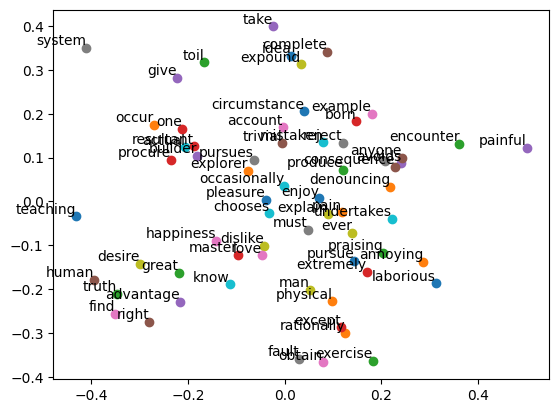

In [18]:
import matplotlib.pyplot as plt
for i, val in enumerate(tokenizer.word_index.keys()):
    x, y = reduced[i]
    # print(x, y)
    plt.scatter(x, y)
    plt.annotate(val, xy=(x,y), ha='right', va='bottom')


In [19]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

In [20]:
distance_matrix = euclidean_distances(embeddings)


In [21]:
data = pd.DataFrame(distance_matrix,index=word_to_index_map.keys())
data.columns = word_to_index_map.keys()

In [22]:
data

,pleasure,pain,great,one,avoids,consequence,obtain,must,explain,mistaken,...,advantage,right,find,fault,man,chooses,enjoy,annoying,produce,resultant
pleasure,0.000000,0.478657,0.445983,0.503840,0.462134,0.550939,0.456447,0.448127,0.401669,0.391550,...,0.456946,0.421776,0.457575,0.528901,0.486344,0.531152,0.410675,0.394600,0.461501,0.387867
pain,0.478657,0.000000,0.725107,0.559230,0.362851,0.773681,0.517097,0.726017,0.609957,0.524069,...,0.821020,0.599276,0.763824,0.815022,0.553647,0.486659,0.663587,0.540932,0.656380,0.431703
great,0.445983,0.725107,0.000000,0.727917,0.753604,0.594452,0.549444,0.656793,0.748569,0.768020,...,0.302635,0.401190,0.301582,0.658351,0.726070,0.672509,0.481339,0.674345,0.467972,0.571097
one,0.503840,0.559230,0.727917,0.000000,0.536359,0.779810,0.707331,0.607066,0.624715,0.634179,...,0.746662,0.650347,0.642151,0.798719,0.685173,0.792706,0.740231,0.713880,0.764098,0.322060
avoids,0.462134,0.362851,0.753604,0.536359,0.000000,0.563040,0.604666,0.594558,0.603478,0.572468,...,0.798218,0.743964,0.795839,0.762045,0.589310,0.620173,0.678463,0.472165,0.629296,0.479720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chooses,0.531152,0.486659,0.672509,0.792706,0.620173,0.882742,0.704094,0.874633,0.723912,0.571251,...,0.820756,0.568736,0.763101,0.864250,0.548094,0.000000,0.708357,0.695784,0.741129,0.577190
enjoy,0.410675,0.663587,0.481339,0.740231,0.678463,0.555327,0.521396,0.662790,0.554868,0.540630,...,0.541036,0.567239,0.618199,0.645850,0.637174,0.708357,0.000000,0.463968,0.288658,0.605517
annoying,0.394600,0.540932,0.674345,0.713880,0.472165,0.571288,0.403677,0.453850,0.343316,0.464764,...,0.662080,0.636750,0.698383,0.440330,0.432257,0.695784,0.463968,0.000000,0.563628,0.675167
produce,0.461501,0.656380,0.467972,0.764098,0.629296,0.398858,0.592729,0.707936,0.725602,0.680658,...,0.559029,0.663134,0.673085,0.794694,0.802680,0.741129,0.288658,0.563628,0.000000,0.586953


In [39]:
for ele in distance_matrix[0].argsort()[-5: ]:
  print(index_to_word_map[ele + 1])

chooses
consequence
system
pursue
painful


In [35]:
test_sen = ["pain occasionally occur toil"]
for sen in test_sen:
  words = sen.split(" ")
  for i in range(len(words)):
    words[i] = word_to_index_map[words[i]]
  o1 = model.predict([words])
  print(o1)
  # print(words)

1/1 [==============================] - 0s 54ms/step
[[5.1283086e-16 8.4363144e-08 8.4182642e-02 6.0261183e-09 2.3811983e-05
  1.4566783e-08 9.2870546e-12 9.6169810e-05 1.9862040e-15 3.4307513e-16
  6.7714573e-13 2.0698506e-13 8.6111145e-09 3.5637221e-04 5.1478106e-03
  9.5656812e-02 1.1979511e-03 1.9480518e-05 1.9624995e-03 3.1809016e-06
  4.6353730e-09 6.7516686e-07 2.7462091e-10 4.1829236e-04 6.2754029e-06
  1.3020917e-07 9.6578548e-16 2.0823420e-15 1.5289458e-16 8.1993379e-14
  6.8762639e-18 5.3878516e-14 9.7364899e-14 3.3625726e-16 5.3290792e-16
  9.9866127e-16 1.4419779e-15 2.5887487e-16 1.0787720e-05 5.5357872e-04
  1.5819307e-02 6.2473172e-01 1.3946724e-01 3.0139390e-02 2.0534577e-05
  3.9776924e-16 1.0863134e-15 3.5601584e-08 1.7581758e-08 4.8176933e-08
  1.8784174e-11 5.4623471e-16 2.0321496e-08 1.3689716e-07 7.1810353e-13
  5.1415125e-08 4.5651580e-11 1.3993290e-10 2.4195954e-06 7.0496206e-11
  1.3685580e-16 2.1873339e-08 3.7948582e-17 1.8247335e-04]]


In [36]:
o1[0].argmax()

41

In [37]:
index_to_word_map[41]

'circumstance'